# Ejercicio: Imputación de Datos en un Dataset de Salud Mental de Estudiantes

## Contexto

Este ejercicio tiene como objetivo mejorar tus habilidades en la imputación de datos faltantes. Trabajarás con un dataset llamado **"Student Mental Health with NaN - Study Hours"** que contiene información sobre la salud mental y el rendimiento académico de un grupo de estudiantes universitarios. Tu tarea será identificar qué columnas tienen valores faltantes, analizar su distribución y decidir el método de imputación adecuado para completar los datos de manera precisa.

## Descripción de los Campos del Dataset

El dataset contiene información relevante de estudiantes, organizada en las siguientes columnas:

- **`age`**: Edad del estudiante, un valor numérico que representa la edad en años.
- **`gender`**: Género del estudiante, con valores "Male" (Masculino) o "Female" (Femenino).
- **`study_hours`**: Horas promedio de estudio al día, una variable numérica continua que refleja el tiempo dedicado al estudio.
- **`mental_health_score`**: Puntuación en una escala de salud mental, de 1 a 10, donde 1 indica baja salud mental y 10 indica alta salud mental.
- **`exam_score`**: Puntaje en el examen final, en una escala continua, con una media y desviación estándar específicas.

## Instrucciones del Ejercicio

### Exploración de Datos e Identificación de Valores Faltantes:

1. Carga el dataset y realiza un análisis exploratorio para identificar qué columnas contienen valores faltantes.
2. Utiliza visualizaciones y técnicas de análisis para examinar la distribución de los datos y observar si existen patrones o relaciones que puedan afectar tu elección de método de imputación.

### Elección del Método de Imputación:

1. Selecciona un método de imputación adecuado para las columnas con datos faltantes. Puedes elegir entre las siguientes opciones (o proponer otro método que consideres adecuado):
   - **Imputación con la media o mediana**: Útil si la variable sigue una distribución simétrica.
   - **Imputación KNN**: Considera la similitud con otras observaciones en función de variables relacionadas.
   - **Interpolación Spline**: Apropiado para datos continuos que puedan seguir una tendencia.
   - **Regresión Lineal**: Predice valores basándose en relaciones con otras variables.

### Justificación del Método:

- Justifica tu elección de método de imputación para cada columna con valores faltantes. Explica por qué consideras que el método seleccionado es el más adecuado en función de la naturaleza de los datos y de las relaciones observadas en la exploración inicial.

### Imputación de Valores Faltantes:

- Imputa los valores faltantes en las columnas que lo necesiten utilizando los métodos seleccionados.
- Documenta cada paso del proceso y guarda versiones de los datos antes y después de la imputación para facilitar el análisis comparativo.

### Evaluación del Rendimiento de la Imputación:

1. Si es posible, utiliza validación cruzada simulando valores faltantes en datos completos para evaluar el rendimiento de la imputación.
2. Emplea métricas como **RMSE (Raíz del Error Cuadrático Medio)**, **MAE (Error Absoluto Medio)** y **\( R^2 \) (Coeficiente de Determinación)** para comparar el rendimiento del método elegido.

### Informe de Resultados:

- Redacta un breve informe donde expliques el proceso de imputación, las decisiones que tomaste y las métricas obtenidas. Incluye visualizaciones antes y después de la imputación para ilustrar los cambios.

## Entregables

- **Código Python**: Un script o notebook con el proceso de imputación y evaluación.
- **Informe de Resultados**: Documento que justifique el método de imputación elegido y evalúe su precisión con métricas, visualizaciones y conclusiones.

## Objetivo de Aprendizaje

Este ejercicio te permitirá desarrollar habilidades en la detección y análisis de datos faltantes, decidir el método adecuado en función del tipo de datos y evaluar el rendimiento de tu elección mediante métricas. Además, te ayudará a adquirir práctica en la presentación y justificación de tus resultados de forma estructurada.


# 1. Carga de Base de datos y exploración inicial 

### Librerias

In [11]:
#librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Carga de Base de datos 

In [13]:
df = pd.read_csv('/Users/pere amat/CE/PIA/imputacion/ejers/ejer1/Student_Mental_Health_with_NaN_study_hours (1).csv')

### Visualización de datos

In [15]:
df.head(10)

,age,gender,study_hours,mental_health_score,exam_score
0,24,Female,5.970188,2,73.769585
1,21,Female,0.874949,3,69.976742
2,28,Female,9.683950,1,64.227372
3,25,Female,2.796290,9,76.959584
4,22,Male,8.223586,8,63.421192
5,24,Female,NaN,2,87.494541
6,27,Female,6.120451,8,78.526615
7,20,Female,3.175743,9,78.993912
8,24,Female,6.994230,1,62.393154
9,28,Female,NaN,5,66.454679


### Visualización de tipos de datos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    int64  
 1   gender               500 non-null    object 
 2   study_hours          400 non-null    float64
 3   mental_health_score  500 non-null    int64  
 4   exam_score           500 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 19.7+ KB


Es muy importante visualizar el tipo de datos de las variables, ya que puede ser necesario transformar alguna variable o codificarla.

gender: categórico nominal
study_hours: numérico continuo
mental_health_score: numérico ordinal
exam_score: numérico continuo"

### Observar las variables con campos vacios

##### Verificar valores nulos:

In [20]:
df.isnull().sum()


age                      0
gender                   0
study_hours            100
mental_health_score      0
exam_score               0
dtype: int64

Como podemos observar, hay una variable (study_hours) que tiene 100 campos vacíos. Esto es importante, ya que puede afectar a los modelos de IA. Por ello, es fundamental evitar todas las posibles inconsistencias en nuestra base de datos

### Mediana, desviación estandar, percentiles, min,max

Si la media y la mediana son muy parecidas, esto indica que los datos probablemente tienen una distribución simétrica. 
En una distribución simétrica, los datos se distribuyen de manera uniforme alrededor de la media, lo que significa que no hay valores extremos (outliers) que afecten el promedio.

In [24]:
df.describe()

,age,study_hours,mental_health_score,exam_score
count,500.000000,400.000000,500.000000,500.000000
mean,23.504000,5.078927,4.998000,70.008054
std,3.543317,2.125244,2.601448,14.533479
min,18.000000,-2.136411,1.000000,26.675932
25%,20.000000,3.784896,3.000000,60.310587
50%,24.000000,5.132639,5.000000,70.574068
75%,27.000000,6.453179,7.000000,79.660650
max,29.000000,11.348884,9.000000,110.313015


Antes que nada, observamos que en el campo study_hours hay valores negativos. En alguna otra variable podría tener sentido, pero en esta no. Por lo tanto, debemos eliminarlo

### Eliminar valores negativos

In [27]:
result = df[df['study_hours'] < 0]
print(result)


     age  gender  study_hours  mental_health_score  exam_score
152   20    Male    -0.145862                    7   83.328983
223   19  Female    -2.136411                    7   82.014050
289   18    Male    -0.156431                    1   56.212298
355   18  Female    -0.424981                    6   79.845413
362   18  Female    -0.058675                    9   74.469734
370   22  Female    -0.294506                    3   77.819429


En este caso, podemos identificar los diferentes índices donde study_hours tiene valores negativos. Eliminaremos estos índices en la nueva base de datos que crearemos, ya que al ser pocos respecto al total, no deberían afectar significativamente al análisis. Sin embargo, en otros contextos podría ser útil considerar la imputación

In [29]:
df_imputacion = df.copy()
df_imputacion = df_imputacion.drop([152, 223, 289, 355, 362, 370], axis=0) 
result = df_imputacion[df_imputacion['study_hours'] < 0]
print(result)

Empty DataFrame
Columns: [age, gender, study_hours, mental_health_score, exam_score]
Index: []


### Codificación variables

Anteriormente observamos que hay una variable categórica, la cual podría causar problemas al aplicar métodos de imputación. Por ello, es importante codificarla con one-hot encoding, ya que no tiene jerarquía y consiste básicamente en categorías

In [32]:

# Aplicar One-Hot Encoding con pd.get_dummies
df_imputacion = pd.get_dummies(df_imputacion, columns=['gender'], drop_first=True)
print(df_imputacion)

     age  study_hours  mental_health_score  exam_score  gender_Male
0     24     5.970188                    2   73.769585        False
1     21     0.874949                    3   69.976742        False
2     28     9.683950                    1   64.227372        False
3     25     2.796290                    9   76.959584        False
4     22     8.223586                    8   63.421192         True
..   ...          ...                  ...         ...          ...
495   23     4.290752                    2   79.167155         True
496   26     1.306455                    7  104.363259        False
497   29     3.866661                    6   71.605636         True
498   22     7.326971                    3   68.417049         True
499   18     3.141336                    6   67.234650        False

[494 rows x 5 columns]


In [33]:
df_imputacion.describe()

,age,study_hours,mental_health_score,exam_score
count,494.000000,394.000000,494.000000,494.000000
mean,23.556680,5.164436,4.991903,69.939953
std,3.528474,2.022103,2.599722,14.573579
min,18.000000,0.320814,1.000000,26.675932
25%,20.000000,3.835761,3.000000,60.304900
50%,24.000000,5.176652,5.000000,70.515909
75%,27.000000,6.493990,7.000000,79.592590
max,29.000000,11.348884,9.000000,110.313015


Ahora, esta visualización tiene más sentido. Observamos que la cantidad de registros está bien distribuida entre las variables y que la mediana de study_hours es 5.16, con una desviación estándar de 2.02, lo que indica que los datos están concentrados alrededor de la media. Podríamos analizar mucho más, pero en este caso no necesitamos más información

# VISUALIZACIÓN

En este apartado he utilizado diferentes tipos de visualizaciones:

##### Visualización univariada: 
He empleado un histograma para examinar la distribución de los datos en una única variable (en este caso, study_hours). Esta visualización permite identificar la forma de la distribución, posibles sesgos y valores atípicos en los datos.
##### Visualización bivariada: 
He utilizado un gráfico de dispersión para analizar la relación entre dos variables. Este tipo de gráfico es útil para detectar posibles tendencias, patrones o correlaciones entre las variables.
##### Matriz de correlación: 
He creado una matriz de correlación, que es especialmente útil para identificar relaciones fuertes o débiles entre múltiples variables. En ella, cada celda muestra el coeficiente de correlación entre dos variables, permitiendo visualizar rápidamente si existen correlaciones significativas."

## HISTOGRAMA 

He utilizado un histograma para verificar la distribución de los datos en el campo study_hours, ya que este tipo de gráfico permite observar cómo se distribuyen los valores de forma visual.

<!-- # VISUALIZACIÓN -->

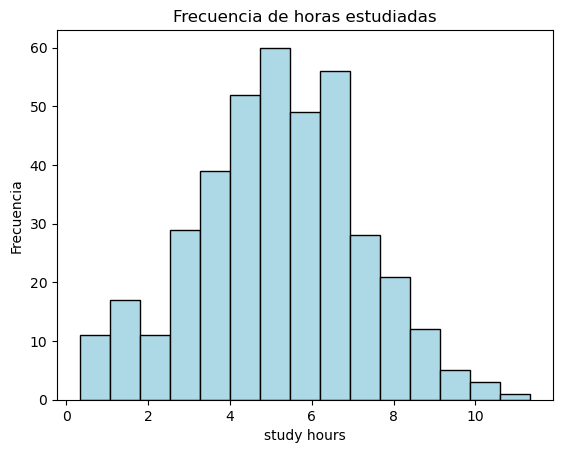

In [40]:
plt.hist(df_imputacion['study_hours'], 
         bins=15, 
         color='lightblue', 
         edgecolor='black')

plt.title('Frecuencia de horas estudiadas')
plt.xlabel('study hours')
plt.ylabel('Frecuencia')

# Show the plot
plt.show()


Este gráfico muestra la frecuencia según las horas estudiadas. Como podemos ver, la distribución tiene forma de campana, lo que indica que es simétrica alrededor de su media. Esto significa que los datos se distribuyen de manera igual a ambos lados de la media.

## Grafico de Dispersión

Text(0, 0.5, 'exam_score')

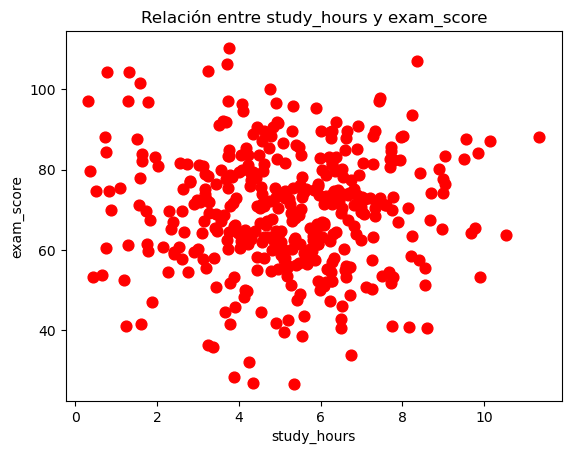

In [43]:
plt.scatter(df_imputacion['study_hours'], df_imputacion['exam_score'], 
            color='red', 
            s=60)  # s is equivalent to cex in R for point size

plt.title("Relación entre study_hours y exam_score")
plt.xlabel("study_hours")
plt.ylabel("exam_score")


En este gráfico de dispersión observamos que los datos no siguen una tendencia lineal. Es decir, en este contexto, estudiar más no parece ser un factor importante para obtener mejores resultados en los exámenes, ya que los datos están distribuidos de manera muy dispersa

## Matrriz de correlación 

age                    0.046318
study_hours            1.000000
mental_health_score   -0.074533
exam_score            -0.016225
gender_Male           -0.017118
Name: study_hours, dtype: float64


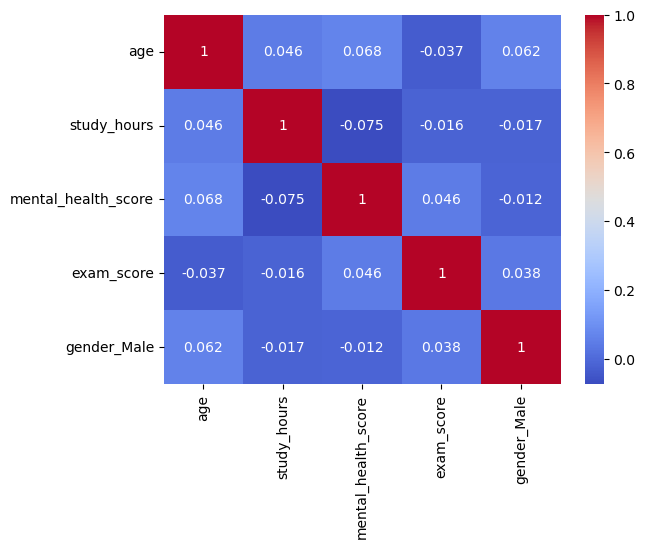

In [46]:
# Matriz de correlación
correlaciones = df_imputacion.corr()
print(correlaciones['study_hours'])  # Correlación de la variable faltante con otras

# Mapa de calor de correlación
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.show()


El mapa de calor muestra que las correlaciones entre las variables son muy bajas, con valores cercanos a 0. La correlación más alta es entre age y gender_Male (0.062), mientras que study_hours tiene correlaciones débiles con todas las demás variables, con valores de -0.075 a 0.046. En general, no se observa una relación significativa entre las variables del conjunto de datos.

# Debate qué modelo Utilizar

## Imputacion media o mediana

Por qué utilizar este método: Este método en este contexto puede ser eficiente, ya que nuestra distribución como hemos visto en el histograma nos muestra que hay una distribución normall, es decir en forma de campana, por lo tanto al imputar con media o mediana no deberia de afectar a la distribucion de los datos

## Interpolación Spline

Por qué no es recomendable aquí: La interpolación spline es útil para datos que siguen una tendencia continua en una serie temporal 
o un orden lógico (por ejemplo, datos que cambian con el tiempo o alguna secuencia). En este conjunto de datos, study_hours no sigue 
una tendencia temporal ni secuencial, por lo que usar interpolación spline podría introducir patrones artificiales
que no existen en los datos originales.

## KNN

????? es útil cuando la similitud entre las observaciones puede ayudar a predecir valores faltantes en función de las variables relacionadas, incluso si no hay correlaciones lineales claras o fuertes.

## Regressión Lineal

Por qué no es recomendable aquí: La regresión lineal predice valores en función de relaciones entre variables. Como los coeficientes de correlación entre study_hours y otras variables son muy bajos, ademas mediante graficos hemos visto que no hay una tendencia continua.

# ¿Media o Mediana o KNN?

Distribución simétrica (gaussiana): Si la variable parece tener una distribución simétrica (como una campana), la imputación con media o mediana puede ser una buena opción.
Distribución sesgada: Si la distribución de la variable es sesgada o tiene muchos valores atípicos, la mediana es preferible a la media, ya que es menos sensible a los valores extremos.

In [59]:
from scipy.stats import skew

# Supongamos que `df` es tu DataFrame y `study_hours` la columna en cuestión
skewness = skew(df_imputacion['study_hours'].dropna())
print(f"Asimetría (skewness): {skewness}")



Asimetría (skewness): -0.034793706736757433


Dado que la asimetría es solo -0.34, el sesgo es mínimo, podriamos utilizar media o mediana

# Imputacion por Media

### Creamos dataframe para la imputacion

In [63]:
df_imputacion_media = df_imputacion.copy()

In [64]:
# Imputar los valores nulos en 'study_hours' con la media de esa columna
df_imputacion_media['study_hours'] = df_imputacion_media['study_hours'].fillna(df_imputacion_media['study_hours'].mean())


In [65]:
df_imputacion_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  494 non-null    int64  
 1   study_hours          494 non-null    float64
 2   mental_health_score  494 non-null    int64  
 3   exam_score           494 non-null    float64
 4   gender_Male          494 non-null    bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 19.8 KB


# Imputacion por Mediaana

In [67]:
df_imputacion_mediana = df_imputacion.copy()

In [68]:
# Imputar los valores nulos en 'study_hours' con la media de esa columna
df_imputacion_mediana['study_hours'] = df_imputacion_mediana['study_hours'].fillna(df_imputacion_mediana['study_hours'].median())

In [69]:
df_imputacion_mediana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  494 non-null    int64  
 1   study_hours          494 non-null    float64
 2   mental_health_score  494 non-null    int64  
 3   exam_score           494 non-null    float64
 4   gender_Male          494 non-null    bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 19.8 KB


In [70]:

df_imputacion_media.describe()

,age,study_hours,mental_health_score,exam_score
count,494.000000,494.000000,494.000000,494.000000
mean,23.556680,5.164436,4.991903,69.939953
std,3.528474,1.805411,2.599722,14.573579
min,18.000000,0.320814,1.000000,26.675932
25%,20.000000,4.254521,3.000000,60.304900
50%,24.000000,5.164436,5.000000,70.515909
75%,27.000000,6.234193,7.000000,79.592590
max,29.000000,11.348884,9.000000,110.313015


In [71]:
df_imputacion_mediana.describe()

,age,study_hours,mental_health_score,exam_score
count,494.000000,494.000000,494.000000,494.000000
mean,23.556680,5.166909,4.991903,69.939953
std,3.528474,1.805417,2.599722,14.573579
min,18.000000,0.320814,1.000000,26.675932
25%,20.000000,4.254521,3.000000,60.304900
50%,24.000000,5.176652,5.000000,70.515909
75%,27.000000,6.234193,7.000000,79.592590
max,29.000000,11.348884,9.000000,110.313015


La única diferencia entre df_imputacion_media y df_imputacion_mediana está en un cambio mínimo en la media de study_hours, que no es significativo. Esto significa que, al graficar, no habrá cambios visibles entre los dos dataframes

# VISUALIZACION 2 

A continuación, grafico varios histogramas, tanto antes como después de la imputación. El primer histograma muestra la imputación utilizando la media, y el segundo muestra la imputación con la mediana. Esto nos ayudará a evaluar cuál de los dos métodos es más adecuado o si debemos considerar otros métodos de imputación

### COMPARACIÓN ANTES Y DESPUES IMPUTANDO MEDIA

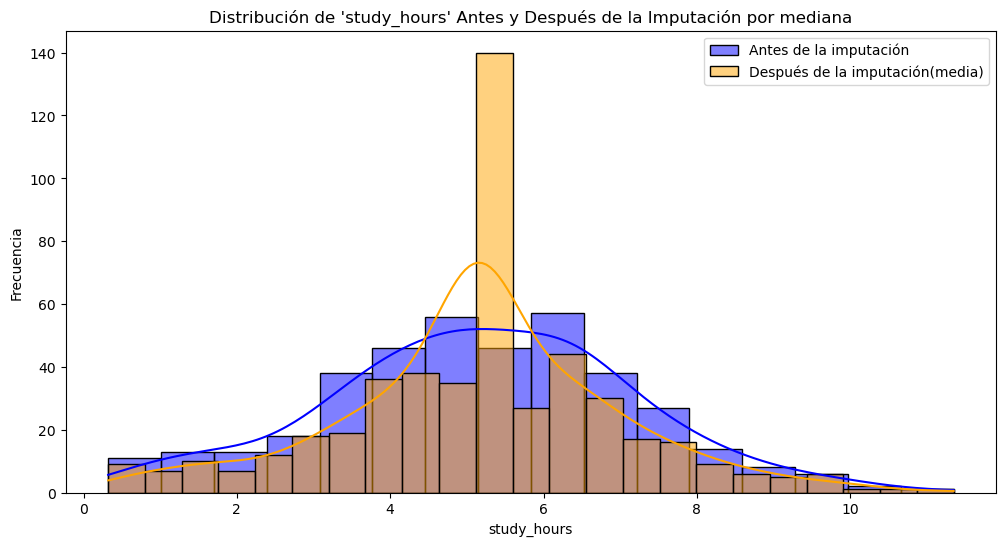

In [76]:
# Crear un histograma de study_hours antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.histplot(df_imputacion['study_hours'], color='blue', label='Antes de la imputación', kde=True)
sns.histplot(df_imputacion_media['study_hours'], color='orange', label='Después de la imputación(media)', kde=True)
plt.title("Distribución de 'study_hours' Antes y Después de la Imputación por mediana")
plt.xlabel("study_hours")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

El siguiente histograma muestra un conjunto de dos datasets, que representan la distribución de los datos antes y después de la imputación por la media. Como resultado, podemos observar que ahora hay un valor muy diferenciado de los demás, ya que de los 500 registros, 100 tuvieron que ser imputados con la media. Podríamos probar con otro modelo de imputación, pero según la distribución y la correlación entre variables, es posible que otros métodos resulten incluso peores

### COMPARACIÓN ANTES Y DESPUES IMPUTANDO MEDIANA

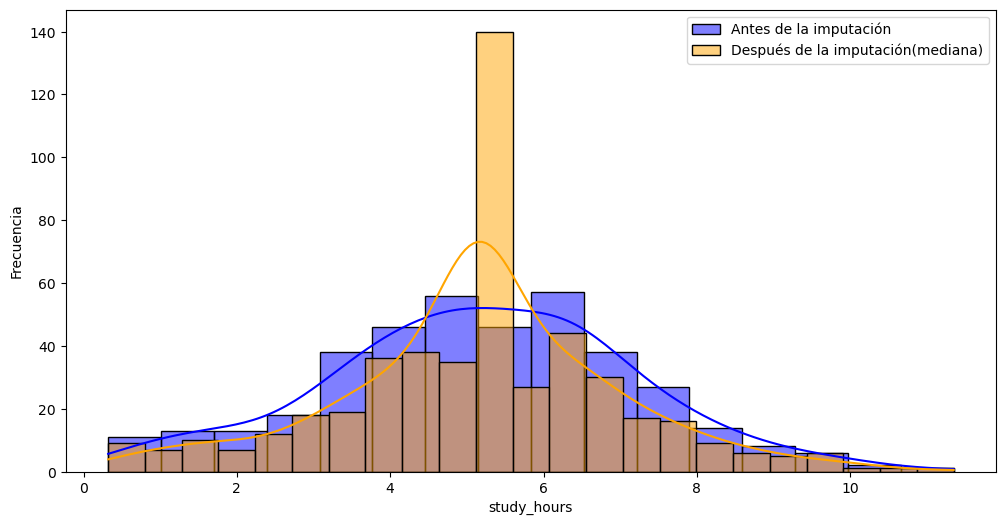

In [79]:
# Crear un histograma de study_hours antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.histplot(df_imputacion['study_hours'], color='blue', label='Antes de la imputación', kde=True)
sns.histplot(df_imputacion_mediana['study_hours'], color='orange', label='Después de la imputación(mediana)', kde=True)
# plt.title("Distribución de 'study_hours' Antes y Después de la Imputación por mediana")
plt.xlabel("study_hours")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Con la imputación por mediana, el gráfico es prácticamente igual o no se aprecian cambios significativos respecto a la imputación por media. Esto sugiere que, en este caso, ambos métodos de imputación no han afectado considerablemente la distribución de los datos.

### COMPARACIÓN ASIMETRIA

En este caso, las dos imputaciones son muy similares, pero si quisiéramos saber cuál distribuye mejor los datos para obtener una gráfica más simétrica, deberíamos calcular la asimetría (skewness) de cada imputación.

In [83]:
from scipy.stats import skew

# Supongamos que `df` es tu DataFrame y `study_hours` la columna en cuestión
skewness1 = skew(df_imputacion_media['study_hours'].dropna())
skewness2 = skew(df_imputacion_mediana['study_hours'].dropna())
print(f"Asimetría para media (skewness): {skewness1}")
print(f"Asimetría para mediana (skewness): {skewness2}")

Asimetría para media (skewness): -0.03895974109995772
Asimetría para mediana (skewness): -0.04307244557548021


### CONCLUSIÓN MEDIA O MEDIANA
Podemos observar que la imputación por media es mejor, ya que tiene menos asimetría y, por lo tanto, es más simétrica en comparación con el método de imputación por mediana. La asimetría para la media (skewness) es -0.0389, mientras que la asimetría para la mediana (skewness) es -0.0431

Aunque con todo lo que te he mencionado, es necesario decir que el gráfico antes y después de la imputación muestra una diferencia considerable, ya que destaca un valor muy diferente de los demás. Por lo tanto, debemos probar con otros modelos de imputación para obtener resultados más representativos

 # KNN

Utilicé KNN para imputar los valores faltantes sin separar los datos en entrenamiento y prueba. Esto me permitió usar toda la información disponible para hacer una imputación más precisa. Al no dividir los datos antes, evité que el modelo se viera influenciado solo por el conjunto de entrenamiento, lo que podría haber hecho que los valores imputados no reflejaran bien los datos completos

#### Creeamos nuevo dataframe 

In [88]:
df_knn2 = df_imputacion.copy()

"Imputé los valores faltantes con KNN sin separar los datos en train y test. Esto permitió usar toda la información disponible para una imputación más precisa. Si separara los datos, los valores del conjunto de prueba podrían ser reemplazados por el promedio del conjunto de entrenamiento, lo que haría que los datos del test no reflejaran bien la variedad real de los datos.

#### normalización variables

In [91]:
scaler = StandardScaler()
df_knn_scaled = scaler.fit_transform(df_knn2)

### Crear y aplicar el KNN Imputer

In [93]:
# Inicializar e imputar usando KNN
imputer = KNNImputer(n_neighbors=4)  # Ajusta el número de vecinos según tus necesidades
df_knn_imputed_scaled = imputer.fit_transform(df_knn_scaled)

### Desnormalizar los datos a su escala original

In [95]:
 #Revertir el escalado después de la imputación y convertir a DataFrame con nombres de columnas
df_knn_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_imputed_scaled), columns=df_knn2.columns)


### Convertir los datos imputados a un DataFrame y asignarlos correctamente

In [97]:
print(df_knn_imputed)

      age  study_hours  mental_health_score  exam_score  gender_Male
0    24.0     5.970188                  2.0   73.769585          0.0
1    21.0     0.874949                  3.0   69.976742          0.0
2    28.0     9.683950                  1.0   64.227372          0.0
3    25.0     2.796290                  9.0   76.959584          0.0
4    22.0     8.223586                  8.0   63.421192          1.0
..    ...          ...                  ...         ...          ...
489  23.0     4.290752                  2.0   79.167155          1.0
490  26.0     1.306455                  7.0  104.363259          0.0
491  29.0     3.866661                  6.0   71.605636          1.0
492  22.0     7.326971                  3.0   68.417049          1.0
493  18.0     3.141336                  6.0   67.234650          0.0

[494 rows x 5 columns]


In [98]:
df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  494 non-null    float64
 1   study_hours          494 non-null    float64
 2   mental_health_score  494 non-null    float64
 3   exam_score           494 non-null    float64
 4   gender_Male          494 non-null    float64
dtypes: float64(5)
memory usage: 19.4 KB


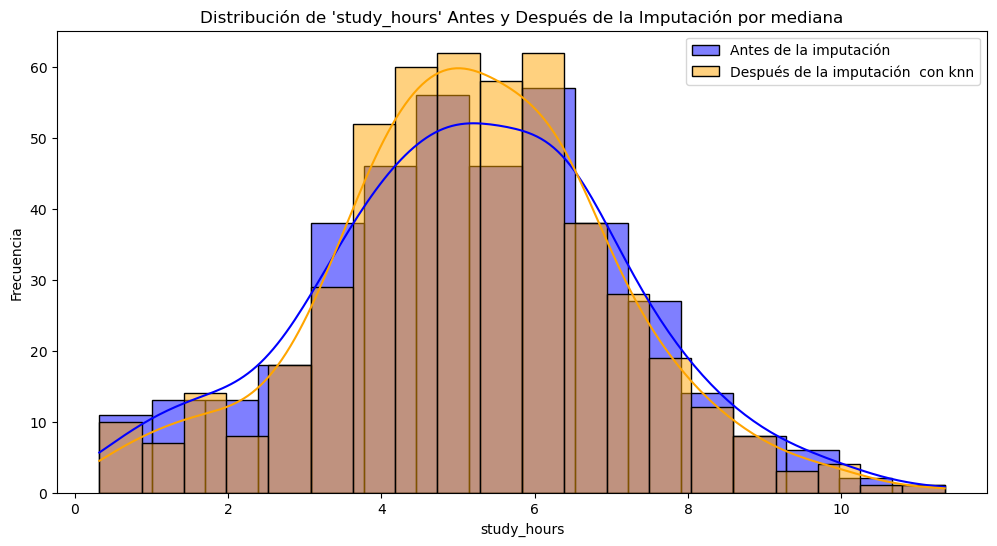

In [99]:
# Crear un histograma de study_hours antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.histplot(df_imputacion['study_hours'], color='blue', label='Antes de la imputación', kde=True)
sns.histplot(df_knn_imputed['study_hours'], color='orange', label='Después de la imputación  con knn', kde=True)
plt.title("Distribución de 'study_hours' Antes y Después de la Imputación por mediana")
plt.xlabel("study_hours")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [100]:
df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  494 non-null    float64
 1   study_hours          494 non-null    float64
 2   mental_health_score  494 non-null    float64
 3   exam_score           494 non-null    float64
 4   gender_Male          494 non-null    float64
dtypes: float64(5)
memory usage: 19.4 KB


En este histograma se puede observar una comparación entre la distribución de los datos antes y después de la imputación utilizando KNN. Aunque se percibe un pequeño cambio en los valores imputados, la forma general del gráfico permanece bastante similar, lo que indica que la imputación no ha alterado significativamente la distribución de los datos. En términos de tendencia, la distribución sigue siendo coherente con la original, lo que sugiere que KNN ha hecho un buen trabajo manteniendo la estructura de los datos

# CONCLUSIÓN FINAL

Tras la exploración inicial de los datos, en la que identifiqué correlaciones entre las variables y otras características, pude descartar el uso de la interpolación spline, ya que no había una relación temporal ni una tendencia lineal en los datos. También descarté la imputación por regresión debido a que, en los gráficos de dispersión, los datos no mostraban una tendencia clara ascendente ni descendente. Por lo tanto, me quedé con dos opciones: imputación por media/mediana o KNN.

Al comparar la imputación por media y por mediana, observé que la media era ligeramente mejor, ya que presentaba menos asimetría, aunque ambos métodos generaban gráficos bastante similares. En comparación, el histograma de los datos originales (sin imputar) era completamente diferente, ya que mostraba una fuerte concentración en un valor central, el promedio.

Aunque inicialmente no estaba seguro de la eficacia de KNN, decidí probarlo sin dividir los datos en conjuntos de entrenamiento y prueba. Al hacerlo, observamos que KNN imputó los valores de manera que no se concentraron en un valor específico, manteniendo la distribución de los datos casi intacta. De hecho, el cambio fue bastante insignificante, lo que sugiere que KNN ha sido un método adecuado para la imputación en este caso